In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Take Independent features as x and dependent feature as y
x = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = iris.target
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [2]:
# Use StandardScaler to scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [3]:
# Display coverience matrix
# The columns in the x_scaled will become the rows in the coverience matrix
rows = x_scaled.T
coverience_matrix = np.cov(rows)
print(coverience_matrix)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [4]:
# Eigen values and Eigen vectors
# Eigen vectors (principal components) determine the directions and 
# Eigen values determine the magnitude 
eigen_values,eigen_vectors = np.linalg.eig(coverience_matrix)
print("Eigen Vectors :", eigen_vectors)
print("Eigen Values :", eigen_values)

# Let us see which eigen value has maximum varience
for i in range(len(eigen_values)):
	print(eigen_values[i]/sum(eigen_values))
 
pc1 = x_scaled.dot(eigen_vectors.T[0])	
pc2 = x_scaled.dot(eigen_vectors.T[1])

# Now compose the data frame for our analysis
# Take pc1 on x-axis and pc2 on y-axis
df = pd.DataFrame(data = pc1, columns = ['PC1'])
df['PC2'] = pc2
df['target'] = y
df

Eigen Vectors : [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
Eigen Values : [2.93808505 0.9201649  0.14774182 0.02085386]
0.7296244541329987
0.2285076178670176
0.03668921889282877
0.0051787091071548


,PC1,PC2,target
0,-2.264703,-0.480027,0
1,-2.080961,0.674134,0
2,-2.364229,0.341908,0
3,-2.299384,0.597395,0
4,-2.389842,-0.646835,0
...,...,...,...
145,1.870503,-0.386966,2
146,1.564580,0.896687,2
147,1.521170,-0.269069,2
148,1.372788,-1.011254,2


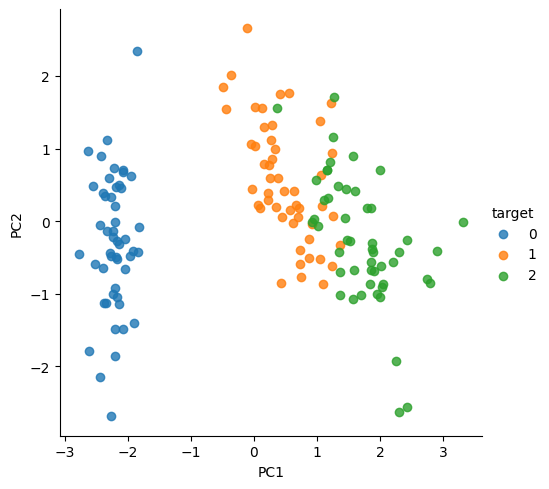

In [5]:
# Plot the data
sns.lmplot(data = df, x = 'PC1', y = 'PC2', hue = 'target', fit_reg = False)

In [6]:
# Method 2 : using PCA class in sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
projected = pca.fit_transform(x_scaled)

# From projected data, take 0th column as pc1 and 1st column as pc2
pc1 = projected[:,0]
pc2 = projected[:,1]

# create a data frame 
df1 = pd.DataFrame(pc1, columns = ['PC1'])
df1['PC2'] = pc2
df1['target'] = y
df1

,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


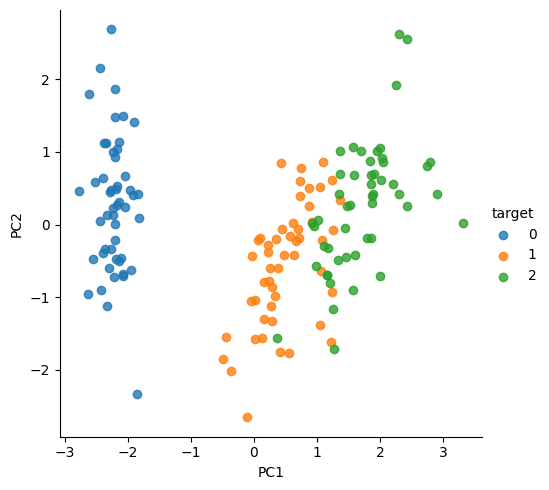

In [7]:
# Plot the data
sns.lmplot(data = df1, x = 'PC1', y = 'PC2', hue = 'target', fit_reg = False)

In [8]:
# remove the target column and take remaining dataframe
df1 = df1.drop('target', axis=1)

# divide the data into two parts
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1, y, test_size = 0.2)

# Train the model using svm
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)

# Find the accuracy level
model.score(x_test, y_test)


1.0

In [9]:
# Enter the new data for prediction
input_data = pd.DataFrame([[6.6, 3.0, 4.4, 1.4]], columns=iris.feature_names)

# convert the inputs to scaled data
scaled = scaler.transform(input_data)
print(scaled)

#apply pca and transform the data
pca_data = pca.transform(scaled)

# predict the data
model.predict(pca_data)

[[ 0.91683689 -0.13197948  0.36489628  0.26414192]]


/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])